In [1]:
import scanpy as sc

In [2]:
import pandas as pd

In [12]:
basedir = './run_cellmatch/results_devcell/'

In [13]:
eval_genes = pd.read_csv(basedir + 'eval.csv',index_col=0) # CellMatch evaluation results

In [15]:
eval_genes['query_ref'] = eval_genes['query_name'] + ':' + eval_genes['ref_name']

In [17]:
read_dir_roadmap = "../../..//pipeline_objects/roadmap/"
adata_roadmap = sc.read(read_dir_roadmap + "final_peer_maehr.h5ad")

In [18]:
sc.settings.figdir = 'FigS3_f'

In [19]:
adata_raw = adata_roadmap.raw.to_adata()

/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


In [9]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import logging
import anndata

In [10]:
import matplotlib.pyplot as plt
from matplotlib import colors
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


sc.settings.set_figure_params(dpi=120)
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.set_figure_params(scanpy=True, dpi_save=400,dpi=150)

-----
anndata     0.8.0
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.8.0
appnope             0.1.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cairo               1.19.1
cffi                1.14.0
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
google              NA
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.8.2
ipykernel           5.3.3
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
leidenalg           0.8.1
llvmlite            0.37.0
louvain             0.6.1
matplotlib          3.5.0
mpl_toolkits        NA
natsort             7.0.1
nbinom_ufunc        NA
numba               0.54.1
numexpr             2.7.1
numpy               1.19.5
packaging           21.3
pandas              1.0.5
parso               0.7.0
pexpect             4.8.0
pickle5     

In [6]:
adata = sc.read("../notebooks/tmp.h5ad") # final embedding

In [7]:
adata.shape

(76894, 21906)

- copy embedding from adata to adata_roadmap

In [20]:
genes_cm = {}

In [22]:
eval_genes['ref_name'].value_counts().index

C:Peer:a:EPI    626
G:Maehr:h:16    154
E:Peer:a:DE     144
H:Maehr:d:0      98
Name: ref_name, dtype: int64

In [25]:
genes_cm['genes_esc'] = list(set(eval_genes[(eval_genes['is_shared_cluster_specific']==True) & (eval_genes['ref_name']=='C:Peer:a:EPI')]['gene']))
genes_cm['genes_de'] = list(set(eval_genes[(eval_genes['is_shared_cluster_specific']==True) & (eval_genes['ref_name']=='E:Peer:a:DE')]['gene']))
genes_cm['genes_pfe'] = list(set(eval_genes[(eval_genes['is_shared_cluster_specific']==True) & (eval_genes['ref_name']=='H:Maehr:d:0')]['gene']))
genes_cm['genes_afe'] = list(set(eval_genes[(eval_genes['is_shared_cluster_specific']==True) & (eval_genes['ref_name']=='G:Maehr:h:16')]['gene']))

In [58]:
eval_genes.shape

(1022, 14)

In [27]:
tot = 0
for entry in genes_cm:
    print(len(genes_cm[entry]))
    tot = tot + len(genes_cm[entry])

313
144
98
102


In [28]:
tot

657

In [29]:
sc.tl.score_genes(adata_roadmap, genes_cm['genes_afe'],  score_name='score_CM_afe')

computing score 'score_CM_afe'
    finished: added
    'score_CM_afe', score of gene set (adata.obs).
    747 total control genes are used. (0:00:59)


In [30]:
sc.tl.score_genes(adata_roadmap, genes_cm['genes_pfe'],  score_name='score_CM_pfe')

computing score 'score_CM_pfe'
    finished: added
    'score_CM_pfe', score of gene set (adata.obs).
    891 total control genes are used. (0:00:49)


In [31]:
sc.tl.score_genes(adata_roadmap, genes_cm['genes_de'],  score_name='score_CM_de')

computing score 'score_CM_de'
    finished: added
    'score_CM_de', score of gene set (adata.obs).
    893 total control genes are used. (0:00:45)


In [32]:
sc.tl.score_genes(adata_roadmap, genes_cm['genes_esc'],  score_name='score_CM_esc')

computing score 'score_CM_esc'
    finished: added
    'score_CM_esc', score of gene set (adata.obs).
    975 total control genes are used. (0:00:45)


In [ ]:
genes_cm

- copy embedding

In [33]:
harmony_embed = pd.DataFrame(adata.obsm['X_harmony'])

In [34]:
harmony_embed.index = adata.obs.index

In [35]:
harmony_embed = harmony_embed.loc[adata_roadmap.obs.index,]

In [36]:
cnt = 0
for entry in harmony_embed.index:
    if entry != adata_roadmap.obs.index[cnt]:
        print(entry)
    cnt = cnt + 1

In [37]:
np.asarray(harmony_embed)

array([[105728.37641353,  99860.77784037],
       [104968.0630457 , 100593.38856565],
       [105906.97380252, 100330.09564622],
       ...,
       [-23704.0674539 , -44662.29324433],
       [  6969.11576874, -46526.32877121],
       [ 15235.12397916, -49701.36006721]])

In [38]:
adata_roadmap.obsm['X_harmony'] = np.asarray(harmony_embed)

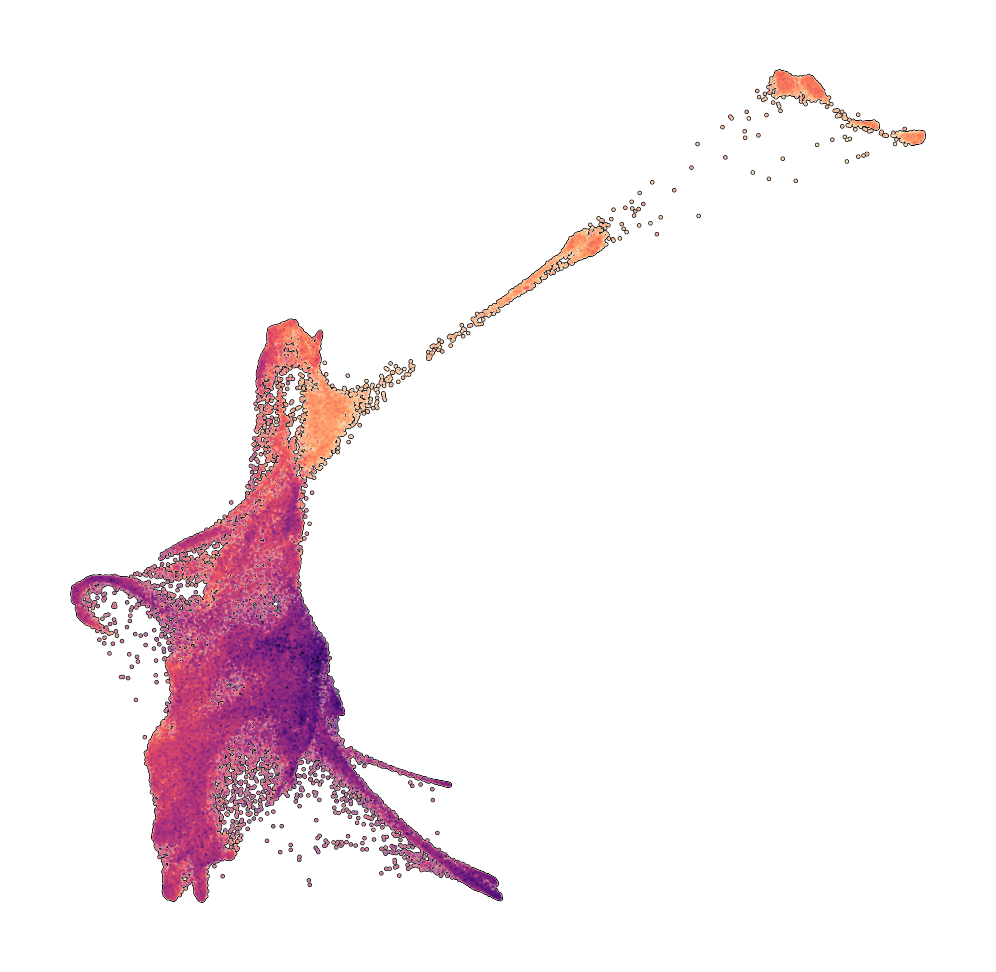

In [53]:
sc.pl.embedding(adata_roadmap,basis='X_harmony',color='score_CM_afe',legend_loc=None,color_map='magma_r',add_outline=True,frameon=False,title='',save='_CM_afe_genes_score_no_leg.png')

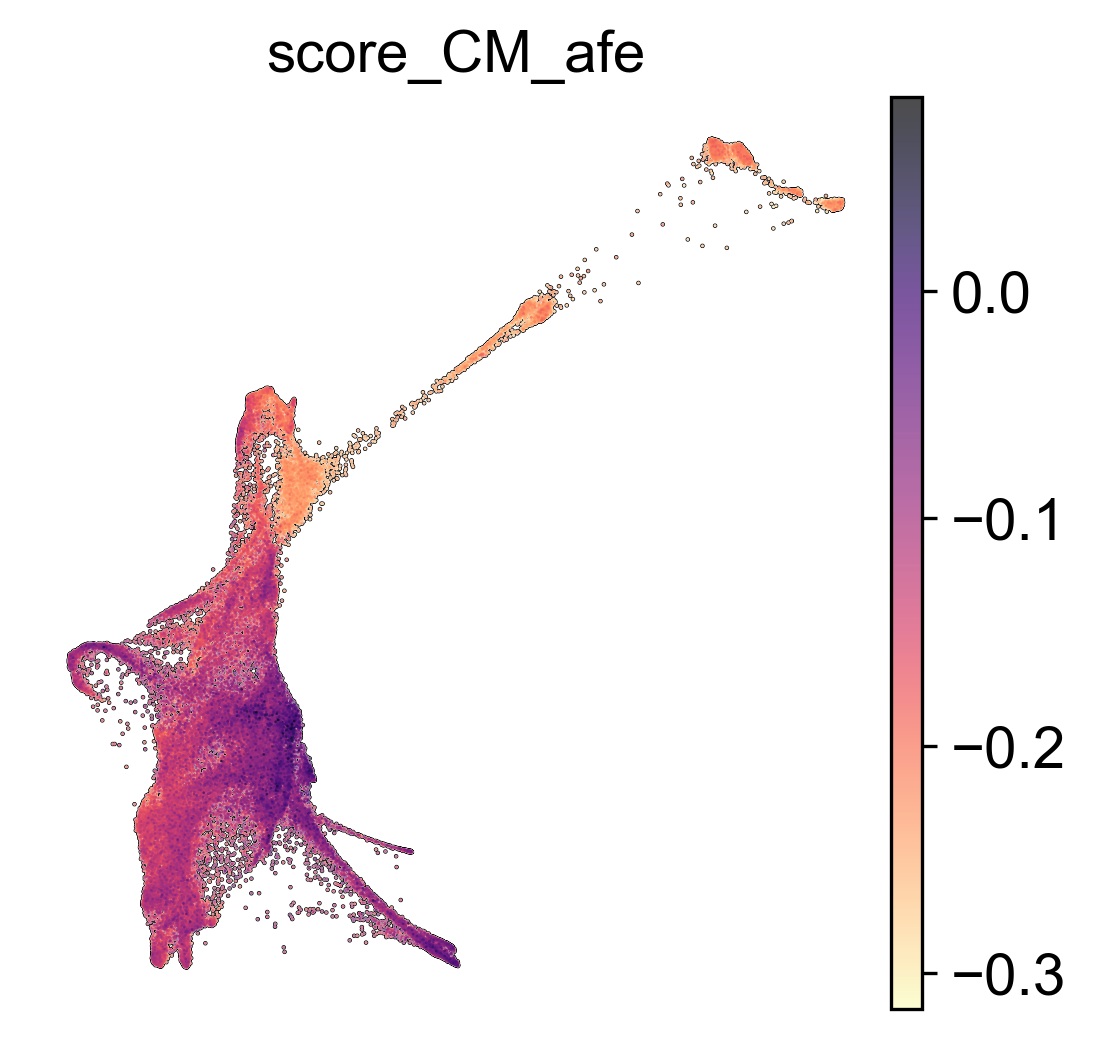

In [41]:
sc.pl.embedding(adata_roadmap,basis='X_harmony',color='score_CM_afe',color_map='magma_r',add_outline=True,frameon=False,save='_CM_afe_genes_score_with_leg.pdf')

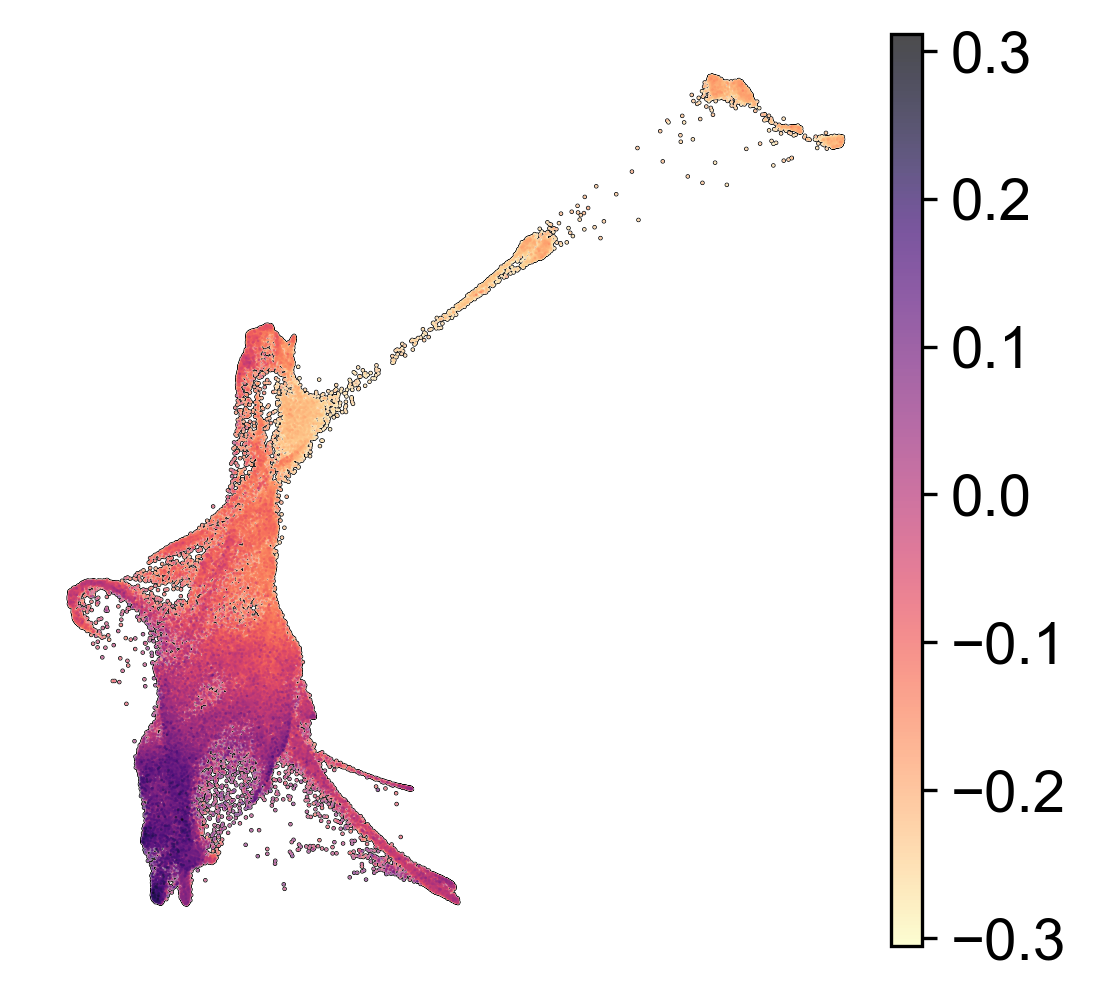

In [54]:
sc.pl.embedding(adata_roadmap,basis='X_harmony',color='score_CM_pfe',color_map='magma_r',add_outline=True,frameon=False,title='',save='_CM_pfe_genes_score_with_leg.pdf')

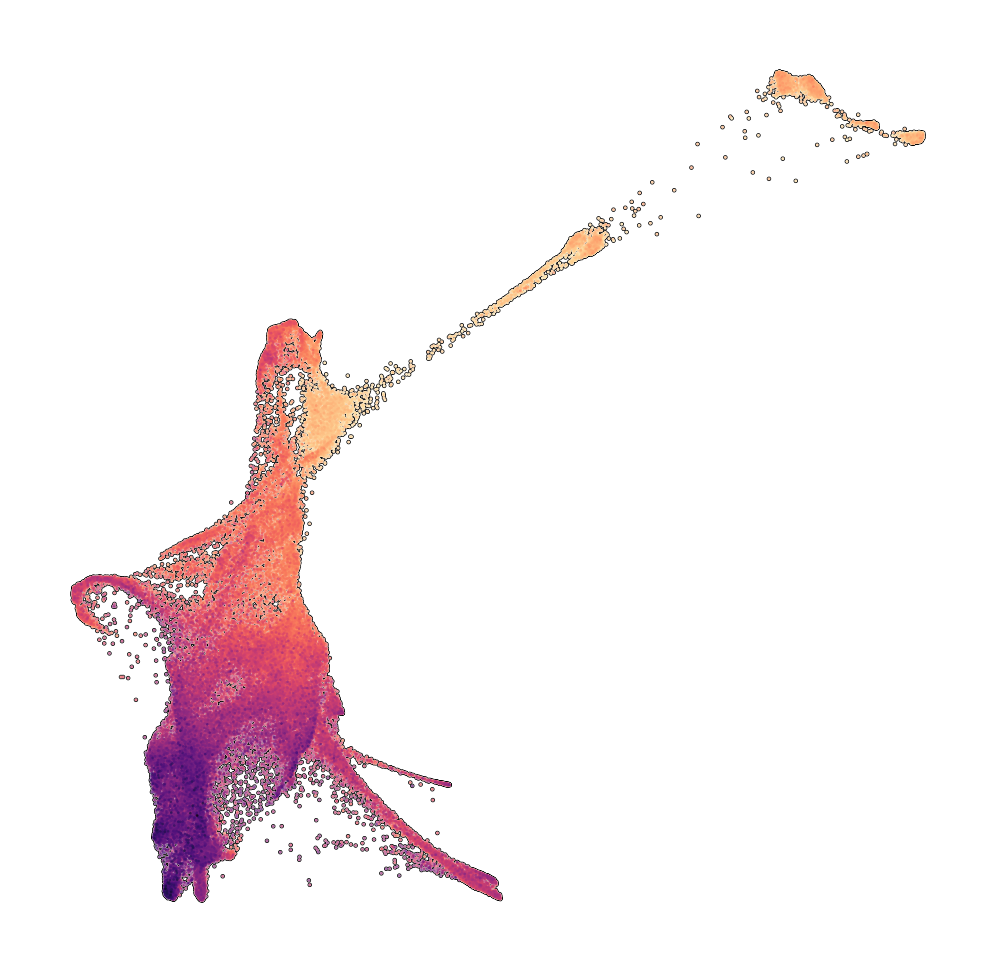

In [55]:
sc.pl.embedding(adata_roadmap,basis='X_harmony',color='score_CM_pfe',color_map='magma_r',add_outline=True,frameon=False,legend_loc=None,title='',save='_CM_pfe_genes_score_no_leg.png')

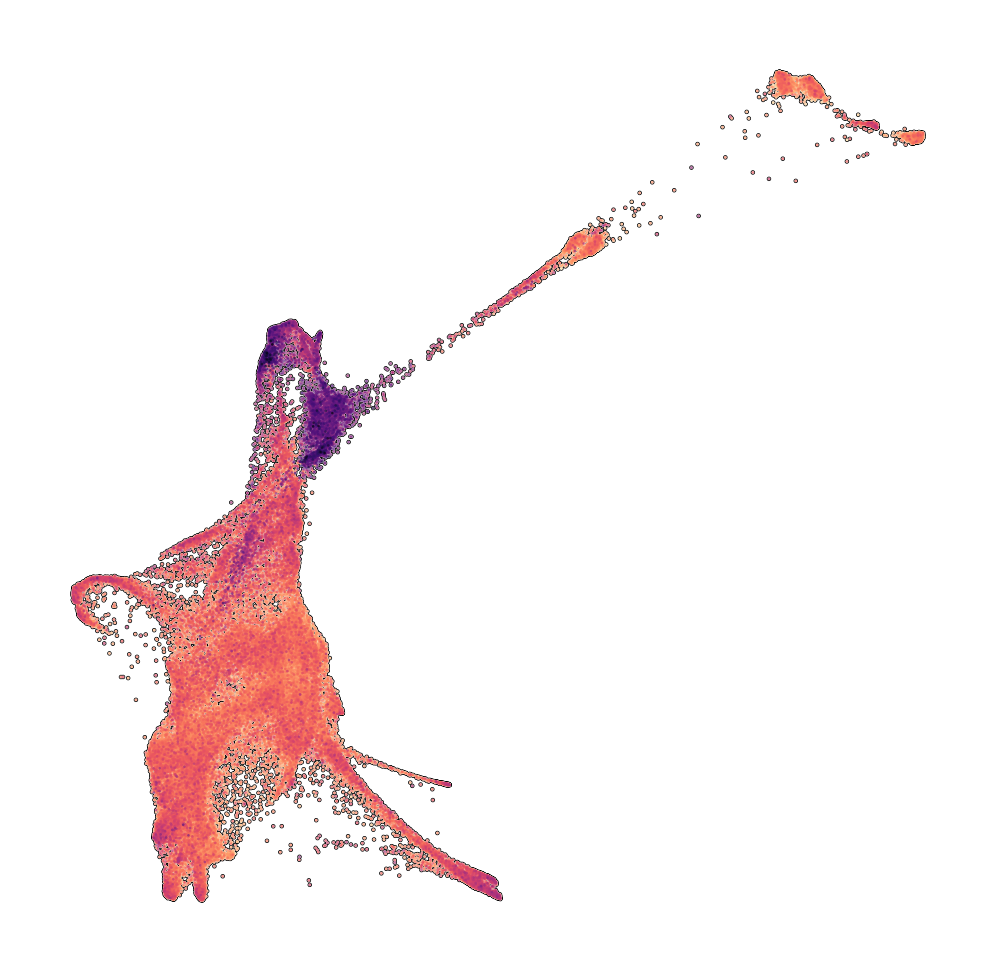

In [56]:
sc.pl.embedding(adata_roadmap,basis='X_harmony',color='score_CM_de',color_map='magma_r',add_outline=True,frameon=False,legend_loc=None,title='',save='_CM_de_genes_score_no_leg.png')

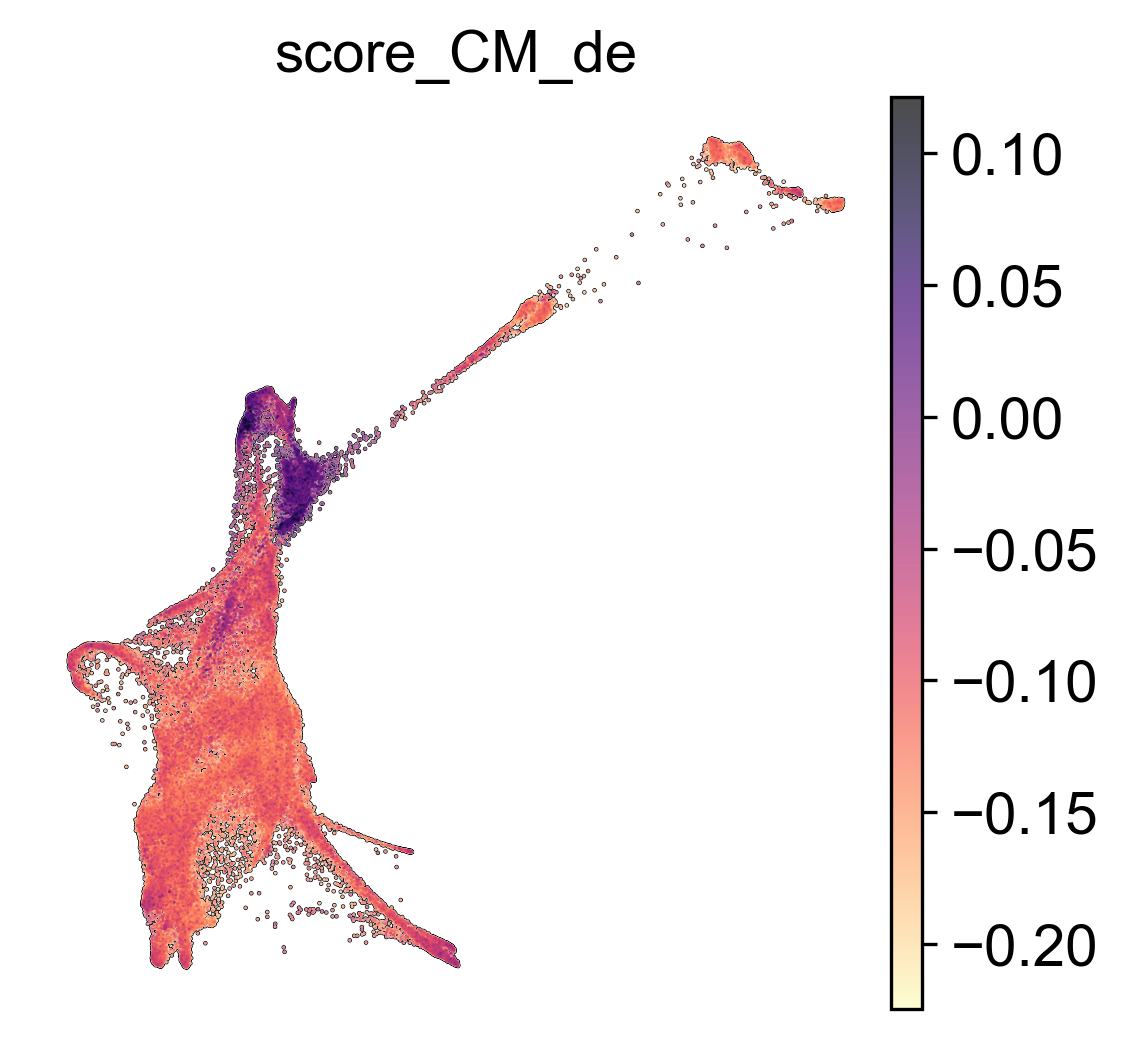

In [45]:
sc.pl.embedding(adata_roadmap,basis='X_harmony',color='score_CM_de',color_map='magma_r',add_outline=True,frameon=False,save='_CM_de_genes_score_with_leg.pdf')

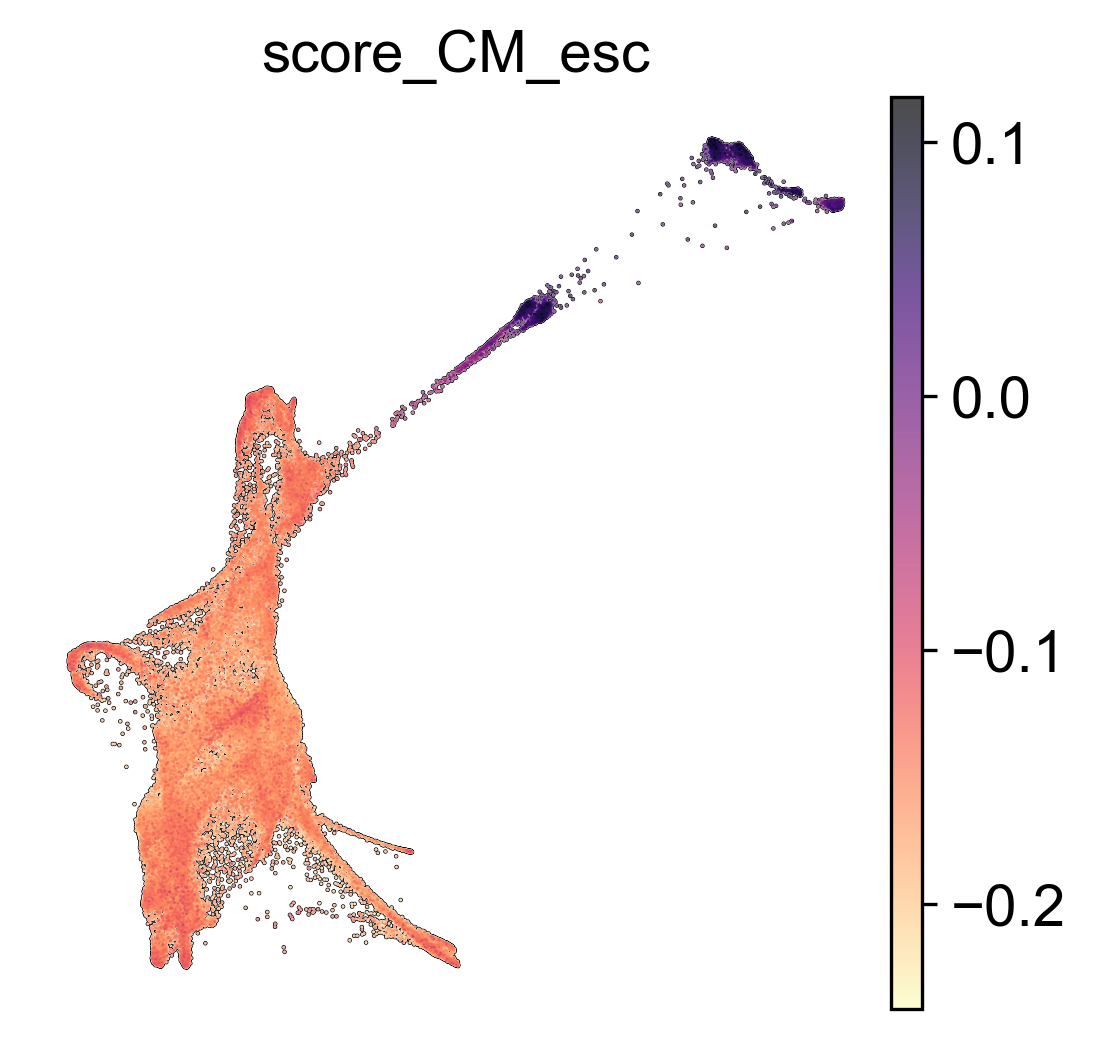

In [46]:
sc.pl.embedding(adata_roadmap,basis='X_harmony',color='score_CM_esc',color_map='magma_r',add_outline=True,frameon=False,save='_CM_esc_genes_score_with_leg.pdf')

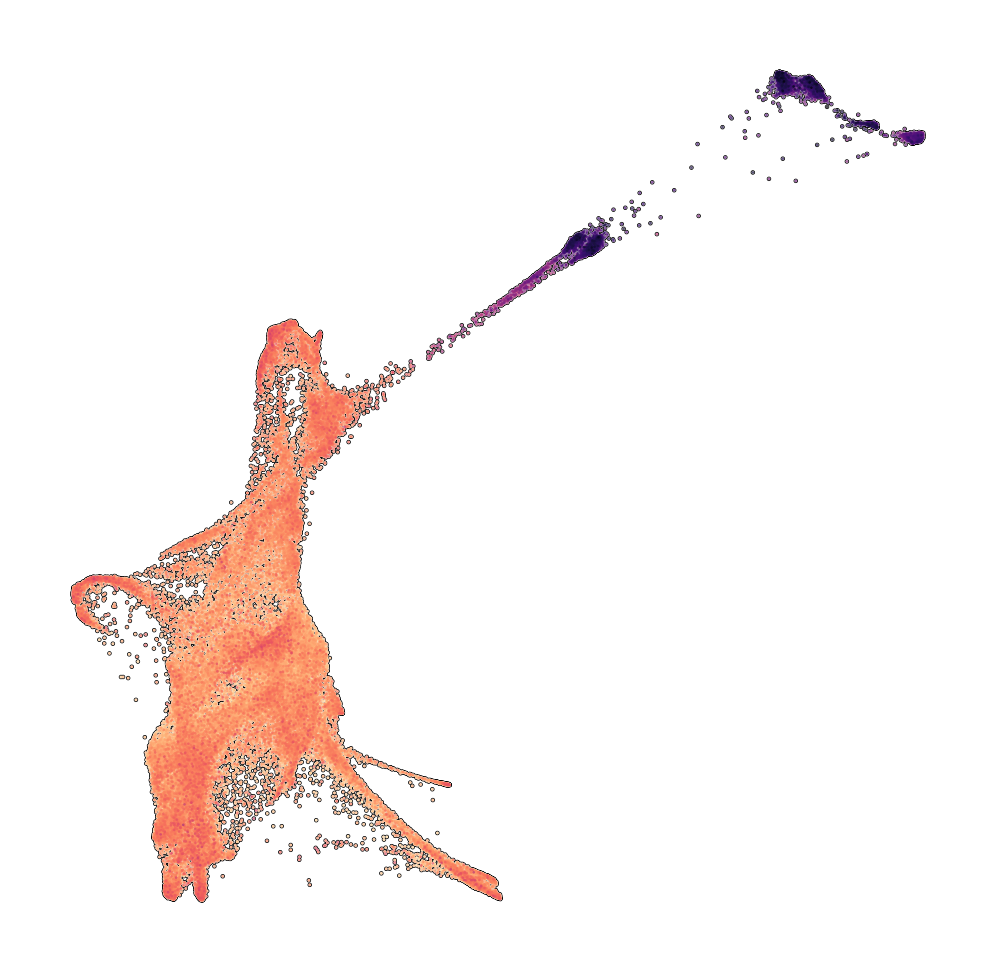

In [57]:
sc.pl.embedding(adata_roadmap,basis='X_harmony',color='score_CM_esc',color_map='magma_r',legend_loc=None,add_outline=True,frameon=False,title='',save='_CM_esc_genes_score_no_leg.png')